# Credit Card Fraud Detection

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("cradit card.csv")
df1 = pd.DataFrame(data)
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df1.shape


(284807, 31)

# Preprocessing of Data

In [5]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
df1.isnull().values.any()

False

In [8]:
count_class  = pd.value_counts(data['Class'],sort = True)
count_class

0    284315
1       492
Name: Class, dtype: int64

Here 0 represents NO Froud done and 1 represents the Froud done .

Text(0.5, 1.0, 'Transactions  class distribution ')

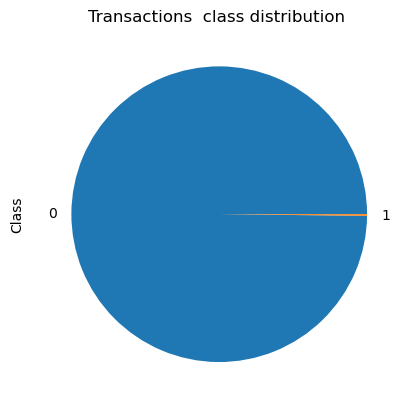

In [9]:
count_class.plot(kind = 'pie' , rot = 0)
plt.title("Transactions  class distribution ")

        Here we can see 0 represents normal tranaction and 1 represents fraud tranaction so the can see that the frequency                   of 1 is very less .
        this shows  the data is hightly unbalanced and needs some preprocessing . 


In [10]:
normal = df1[df1.Class == 0]
normal.shape



(284315, 31)

In [11]:
fraud  = df1[df1.Class == 1]
fraud.shape

(492, 31)

Now Comparing the values for both the transactions 

In [12]:
df1.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Here we can see that these is a significant difference between means of normal transaction and froud transactions. 

Therefore as the number of observations in normal transaction is too much more that the number of transactions of froud we take the sample for normal transactions so that the imbalanced data set can be balanced again. 

Bulding a sample data set of normal transaction data 

the number of  fraudulent  transaction -> 492

In [13]:
normal_sample = normal.sample(n =492)
normal_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
21336,31607.0,1.331990,0.229553,-1.709419,-0.070049,2.556062,3.062893,-0.032812,0.647233,-0.400697,...,-0.050930,-0.243605,-0.180497,1.010036,1.009651,-0.280578,-0.006032,0.003995,1.79,0
162717,115316.0,-0.276708,1.653981,-1.071553,0.420870,1.165375,-1.451869,0.792980,-1.208596,-0.319383,...,1.036429,0.734462,-0.142860,-0.144054,-0.673353,-0.098961,0.199074,0.337769,1.00,0
239584,150172.0,-1.048669,0.949150,1.605349,-0.540851,-0.251007,0.265261,0.235656,0.601766,-0.453472,...,-0.066122,-0.339521,-0.159460,-0.416457,0.367190,-0.411720,-0.060469,0.003946,49.99,0
72304,54649.0,0.983161,-0.060087,0.351686,1.335289,-0.149199,0.167792,0.072680,0.102346,-0.001796,...,-0.004712,0.032357,-0.140568,0.034160,0.612192,-0.337736,0.023653,0.018574,80.22,0
174011,121730.0,-1.475536,1.474522,0.864824,2.520597,0.927360,-0.359094,0.837359,0.244231,-1.796930,...,0.375563,1.061799,-0.157402,0.067385,0.423621,0.136937,-0.227728,0.004141,10.62,0


Now joining the two data sets 

In [14]:
df = pd.concat([normal_sample,fraud] , axis = 0 )
print(df.shape)
df.head()


(984, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
21336,31607.0,1.331990,0.229553,-1.709419,-0.070049,2.556062,3.062893,-0.032812,0.647233,-0.400697,...,-0.050930,-0.243605,-0.180497,1.010036,1.009651,-0.280578,-0.006032,0.003995,1.79,0
162717,115316.0,-0.276708,1.653981,-1.071553,0.420870,1.165375,-1.451869,0.792980,-1.208596,-0.319383,...,1.036429,0.734462,-0.142860,-0.144054,-0.673353,-0.098961,0.199074,0.337769,1.00,0
239584,150172.0,-1.048669,0.949150,1.605349,-0.540851,-0.251007,0.265261,0.235656,0.601766,-0.453472,...,-0.066122,-0.339521,-0.159460,-0.416457,0.367190,-0.411720,-0.060469,0.003946,49.99,0
72304,54649.0,0.983161,-0.060087,0.351686,1.335289,-0.149199,0.167792,0.072680,0.102346,-0.001796,...,-0.004712,0.032357,-0.140568,0.034160,0.612192,-0.337736,0.023653,0.018574,80.22,0
174011,121730.0,-1.475536,1.474522,0.864824,2.520597,0.927360,-0.359094,0.837359,0.244231,-1.796930,...,0.375563,1.061799,-0.157402,0.067385,0.423621,0.136937,-0.227728,0.004141,10.62,0


In [15]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93812.581301,0.039880,0.018823,0.136748,-0.047308,0.084538,-0.008977,0.030559,0.007713,-0.003822,...,-0.018452,-0.030319,0.034086,-0.036791,0.027431,-0.000861,0.000664,0.003660,-0.009384,74.461850
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Checking the Sample is apropriavte for the above population .

Here we are using the variable 'Amount' to check where the same and population have same distribution. 

In [16]:
import statsmodels

In [17]:
from statsmodels.stats.weightstats import ztest as ztest

Ho : sample mean is equal to population mean                                                                                        
H1 : sample mean is not equal to population mean 

In [24]:
x = df1['Amount']
y = df['Amount']
ztest(y , value = 88.291022)# 88.291022 is mean of Amount. 


(1.4536718736098353, 0.14603729969191853)

Here,
z-test = 1.4536718736098353                                                                                                          
pvalue = 0.14603729969191853

The pvalue is 0.146 which is greater than 0.05 ,                                                                                                     Therefore accept H0, the sample and population come from  the same distribution.


Splitting the data into Features and Targets .

In [27]:
 X = df.drop(columns = 'Class' , axis = 1)
 Y = df['Class']

In [28]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
21336    31607.0  1.331990  0.229553 -1.709419 -0.070049  2.556062  3.062893   
162717  115316.0 -0.276708  1.653981 -1.071553  0.420870  1.165375 -1.451869   
239584  150172.0 -1.048669  0.949150  1.605349 -0.540851 -0.251007  0.265261   
72304    54649.0  0.983161 -0.060087  0.351686  1.335289 -0.149199  0.167792   
174011  121730.0 -1.475536  1.474522  0.864824  2.520597  0.927360 -0.359094   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

# Splitting the Data into Train and test

In [30]:
import sklearn as sk 
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3 ,stratify = Y ,random_state = 3)

In [74]:
print(X_train.shape, X_test.shape,Y_train.shape , Y_test.shape)

(688, 30) (296, 30) (688,) (296,)


# Model training

In [75]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # this is initialisation
model.fit(X_train,Y_train) # model training 

LogisticRegression()

# Accuracy 

In [76]:
# print performance matrix
print(" Accuracy for logistic regression : ",  model.score(X_train,Y_train)*100)

 Accuracy for logistic regression :  94.62209302325581


# Make Predicitions

In [77]:
expected = Y_test
predicted = model.predict(X_test)
predicted

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [40]:
from sklearn import metrics 

# summarize the fit of the model

In [78]:
print(metrics.classification_report(expected , predicted))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       148
           1       0.95      0.93      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [79]:
print(metrics.confusion_matrix(expected , predicted))

[[141   7]
 [ 10 138]]


 NOTE  - Its better to check the accuracy of train and test data both coz if the accuracy of train data is more that test data then the model is under fitted 
where as if the accuracy of test is more then it is over fitted 

# Conclusion :

 We get a Accurary of 94.62209302325581